# Decoding Data: A Step by Step Guide to EDA

#### A Comprehensive Analysis for a Dataset of 52,000 Animation Movies

Welcome! I structured this project as a guide for completing a thorough data analysis. This project will walk you through the essential steps, from loading and cleaning data to employing visualization and statistical tools. The ultimate goal here is to familiarize yourself with how a data scientist thinks. 

The dataset used for this project can be found at: https://www.kaggle.com/datasets/asaniczka/52000-animation-movie-details-dataset-2024

## Getting Started:

### Import Libraries

To begin, we will import the essential libraries and packages needed for our analyses. Some fundamental ones often employed include Pandas, Numpy and MatPlotLib. While these form the foundational tools of data analytics, more intricate tasks like machine learning or predictive modeling demand specialized packages and tools. The choice of tools largely depends on your project's objectives

There is a large realm of open-source tools available to the public. For data analytics, it is recommended to import tools and libraries for handling and manipulating data, performing statistical analysis and visualizations. Data science tasks require tools that can implement things like machine learning modeling and deployment.  

For this project, the following packages are sufficient:
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Plotly


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load the Dataset

Next, we will load our dataset from a csv file using the "pd.read_csv()" function in Pandas.

In [51]:
df = pd.read_csv('Animation_Movies.csv')

### Explore our Dataset

Now that the data is loaded, it is time to gain an initial understanding of our dataset. I prefer to perform basic descriptive statistics to explore key aspects. Initially, I want to determine the size of the data and its shape. 

To do so, I will glimpse the first few rows of the dataset using df.head(). I can then look at the dimension with df.shape.

In [52]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [53]:
df.shape

(51945, 23)

#### df.info( )

df.info() provides details about the data types present in teh dataset, along with the column names. Knowing this information helps to get a sense of what data pre-processing techniques will be needed. 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

#### df.describe(  )

It is also useful to look at descriptive statistics. By specifying "(include='object')", the output will retrun the count, unique, top, and frequency of the object-type columns in the dataframe. This command is useful for gaining insights into categorical or textual data.

In [55]:
df.describe(include='object')

,title,status,release_date,backdrop_path,homepage,imdb_id,original_language,original_title,overview,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
count,51944,51945,49808,15835,8253,29552,51945,51944,45866,37934,4678,51945,29398,39700,33818
unique,49381,6,16893,15731,7461,29545,102,50318,44907,37819,4451,2649,11196,1096,617
top,Little Red Riding Hood,Released,2017-01-01,/7tFOLDhZqKPactVlGfdjgVmYnlu.jpg,https://animation.geidai.ac.jp,tt27048168,en,Metamorphosis,An Aesop’s Film Fables cartoon.,/tVRb7CCGuru9RdG1ikGFCceuegy.jpg,animation short,Animation,ONF | NFB,United States of America,English
freq,15,51134,291,17,147,2,28584,9,71,12,104,28393,717,12836,12005


#### Null Values

Using df.isnull().sum() quickly counts the null values in each column. This allows us to quickly identify any missing data. This step is important for ensuring data integrity and for guiding how to handle these gaps later on so that our analysis accurately represent the data. 

In [56]:
#Check which columns have nulls
df.isnull().sum()

id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

### Preparing our Data

#### Clean the Data

In [57]:
#Drop the columns that will not be used
df_cleaned = df.drop(['id', 'backdrop_path', 'homepage', 'imdb_id', 'overview', 'poster_path', 'tagline'], axis=1)


In [58]:
#Handle missing values
df = df_cleaned.dropna()

In [59]:
#Remove duplicate rows
df = df.drop_duplicates()

#Print the dataframe to verify columns are dropped
df

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family",Pixar,United States of America,English
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51933,Viliam,0.000,0,Released,2009-01-01,0,7,False,0,sk,Viliam,0.600,Animation,Ové Pictures,Slovakia,"English, Slovak"
51934,Story of the Christmas Toys,0.000,0,Released,1990-12-24,0,22,False,0,en,Story of the Christmas Toys,0.644,"Animation, Family",Leeway Sound,United States of America,English
51939,Migrante,0.000,0,Released,2019-06-26,0,6,False,0,en,Migrante,0.851,Animation,ANIMA LATINA,Argentina,Spanish
51941,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,False,0,ja,映画しまじろう しまじろうとうるるのヒーローランド,2.531,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin"


#### Create Transformations

In [60]:
#Convert 'adult' column to boolean values with integers (0 or 1)
df['adult'] = df['adult'].astype(int)

In [61]:
#Convert 'release_date' to datetime and save to new df
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

#Create a new column 'release_year' and save the year information from 'release_date' to this column
df['release_year'] = df['release_date'].dt.year

#Create a new column 'release_month' and save the month information from 'release_date' to this column
df['release_month'] = df['release_date'].dt.month


Use df to view the updated dataframe that includes the column changes.

In [62]:
df

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,release_year,release_month
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,0,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English,2015,6
1,Up,7.949,18857,Released,2009-05-28,735099082,96,0,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English,2009,5
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,0,94000000,en,Finding Nemo,55.456,"Animation, Family",Pixar,United States of America,English,2003,5
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,0,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish",2017,10
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,0,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English,2008,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51933,Viliam,0.000,0,Released,2009-01-01,0,7,0,0,sk,Viliam,0.600,Animation,Ové Pictures,Slovakia,"English, Slovak",2009,1
51934,Story of the Christmas Toys,0.000,0,Released,1990-12-24,0,22,0,0,en,Story of the Christmas Toys,0.644,"Animation, Family",Leeway Sound,United States of America,English,1990,12
51939,Migrante,0.000,0,Released,2019-06-26,0,6,0,0,en,Migrante,0.851,Animation,ANIMA LATINA,Argentina,Spanish,2019,6
51941,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,0,0,ja,映画しまじろう しまじろうとうるるのヒーローランド,2.531,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin",2019,3


#### Create Nested Lists

Let us handle some of these columns that hold multiple values per row. 

Specifically, I want to work with the following columns: 'production_companies', 'production_countries', and 'genre'. Each of these columns contain one or more strings, either separated by a ',' and/or 'and'. I want to keep the information in the column because it may provide import insights,and I also want to make it easier to perform analysis on this data. I will create nested lists for these columns.

In [63]:
# Split data at delimiter (comma) and save
df['genres'] = df['genres'].apply(lambda x: [item.strip() for item in re.split(',|and', str(x))])

# Create new columns for each unique genre
df_genres = df['genres'].apply(pd.Series)


# Split data for production companies that are separate by comma or 'and'
df['production_companies'] = df['production_companies'].apply(lambda x: [item.strip() for item in re.split(',|and', str(x))])
# Create new columns for each unique production company
df_production_companies = df['production_companies'].apply(pd.Series)

# Split data for production countries are separated by commas or 'and'
df['production_countries'] = df['production_countries'].apply(lambda x: [item.strip() for item in re.split(',|and', str(x))])
# Create new columns for each unique production country
df_production_countries = df['production_countries'].apply(pd.Series)

#Handle missing values for these splits
df_genres.fillna(value='', inplace=True)
df_production_companies.fillna(value='', inplace=True)
df_production_countries.fillna(value='', inplace=True)


In [64]:
#Calculate the profit from the 'budget' and 'revenue' columns. Handle '0' values from these columns. Save as a new variable.
df['profit'] = df.apply(lambda row: row['revenue'] - row['budget'] if row['budget'] > 0 and row['revenue'] > 0 else 0, axis=1)
df

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,release_year,release_month,profit
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,0,175000000,en,Inside Out,107.292,"[Animation, Family, Adventure, Drama, Comedy]","[Pixar, Walt Disney Pictures]",[United States of America],English,2015,6,682611174
1,Up,7.949,18857,Released,2009-05-28,735099082,96,0,175000000,en,Up,90.968,"[Animation, Comedy, Family, Adventure]",[Pixar],[United States of America],English,2009,5,560099082
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,0,94000000,en,Finding Nemo,55.456,"[Animation, Family]",[Pixar],[United States of America],English,2003,5,846335536
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,0,175000000,en,Coco,166.578,"[Family, Animation, Fantasy, Music, Comedy, Ad...","[Pixar, Walt Disney Pictures]",[United States of America],"English, Spanish",2017,10,625526015
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,0,180000000,en,WALL·E,58.517,"[Animation, Family, Science Fiction]","[Pixar, Walt Disney Pictures]",[United States of America],English,2008,6,341311860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51933,Viliam,0.000,0,Released,2009-01-01,0,7,0,0,sk,Viliam,0.600,[Animation],[Ové Pictures],[Slovakia],"English, Slovak",2009,1,0
51934,Story of the Christmas Toys,0.000,0,Released,1990-12-24,0,22,0,0,en,Story of the Christmas Toys,0.644,"[Animation, Family]",[Leeway Sound],[United States of America],English,1990,12,0
51939,Migrante,0.000,0,Released,2019-06-26,0,6,0,0,en,Migrante,0.851,[Animation],[ANIMA LATINA],[Argentina],Spanish,2019,6,0
51941,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,0,0,ja,映画しまじろう しまじろうとうるるのヒーローランド,2.531,"[Family, Animation, Fantasy]","[Benesse, Sony Music Direct, TOHO, The Answer ...",[Japan],"Japanese, English, Mandarin",2019,3,0


In [65]:
#Check the info for the updated dataframe after all the changes made. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21673 entries, 0 to 51944
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 21673 non-null  object        
 1   vote_average          21673 non-null  float64       
 2   vote_count            21673 non-null  int64         
 3   status                21673 non-null  object        
 4   release_date          21673 non-null  datetime64[ns]
 5   revenue               21673 non-null  int64         
 6   runtime               21673 non-null  int64         
 7   adult                 21673 non-null  int64         
 8   budget                21673 non-null  int64         
 9   original_language     21673 non-null  object        
 10  original_title        21673 non-null  object        
 11  popularity            21673 non-null  float64       
 12  genres                21673 non-null  object        
 13  production_companies 

#### Save the updated CSV for future use

In [66]:
df.to_csv('cleaned_animationmovies.csv', index=False)

In [67]:
df.describe()

,vote_average,vote_count,release_date,revenue,runtime,adult,budget,popularity,release_year,release_month,profit
count,21673.000000,21673.000000,21673,2.167300e+04,21673.00000,21673.000000,2.167300e+04,21673.000000,21673.000000,21673.000000,2.167300e+04
mean,3.915684,94.991003,1993-04-11 02:18:23.935772544,4.403005e+06,29.29050,0.004706,1.329840e+06,3.445145,1992.842015,5.834356,2.842928e+06
min,0.000000,0.000000,1899-01-01 00:00:00,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000,1899.000000,1.000000,-1.711201e+08
25%,0.000000,0.000000,1976-01-01 00:00:00,0.000000e+00,6.00000,0.000000,0.000000e+00,0.600000,1976.000000,2.000000,0.000000e+00
50%,5.429000,1.000000,2003-01-01 00:00:00,0.000000e+00,10.00000,0.000000,0.000000e+00,0.714000,2003.000000,6.000000,0.000000e+00
75%,6.800000,10.000000,2016-01-27 00:00:00,0.000000e+00,49.00000,0.000000,0.000000e+00,1.937000,2016.000000,9.000000,0.000000e+00
max,10.000000,19463.000000,2025-12-26 00:00:00,1.450027e+09,960.00000,1.000000,2.600000e+08,1008.942000,2025.000000,12.000000,1.300027e+09
std,3.349434,743.814795,NaN,4.683616e+07,38.57191,0.068443,1.157974e+07,14.715260,27.596427,3.810693,3.805876e+07


## Exploratory Data Analysis:

#### How many movies were made each year?

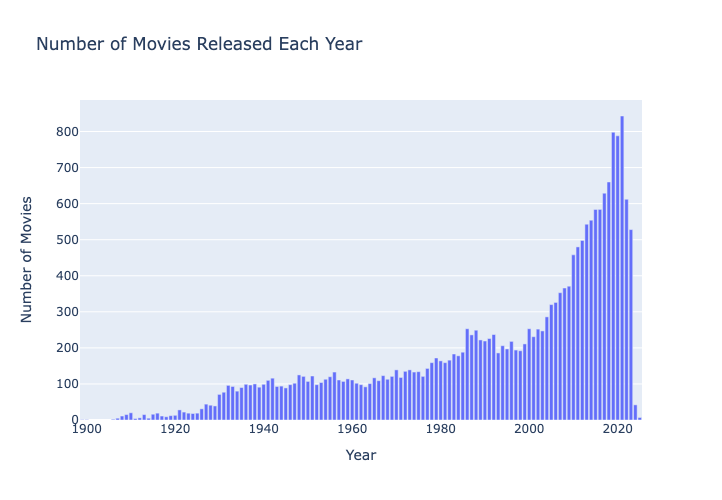

In [68]:
# Count the number of movies for each year
movies_per_year = df['release_year'].value_counts().sort_index()

# Create an interactive bar chart using Plotly
fig = px.bar(x=movies_per_year.index, y=movies_per_year.values, labels={'x': 'Year', 'y': 'Number of Movies'},
             title='Number of Movies Released Each Year', template='plotly', width=900, height=500)

# Show the plot
fig.show()

#### What are viewers likely to rate movies as on a scale from 0 to 10?

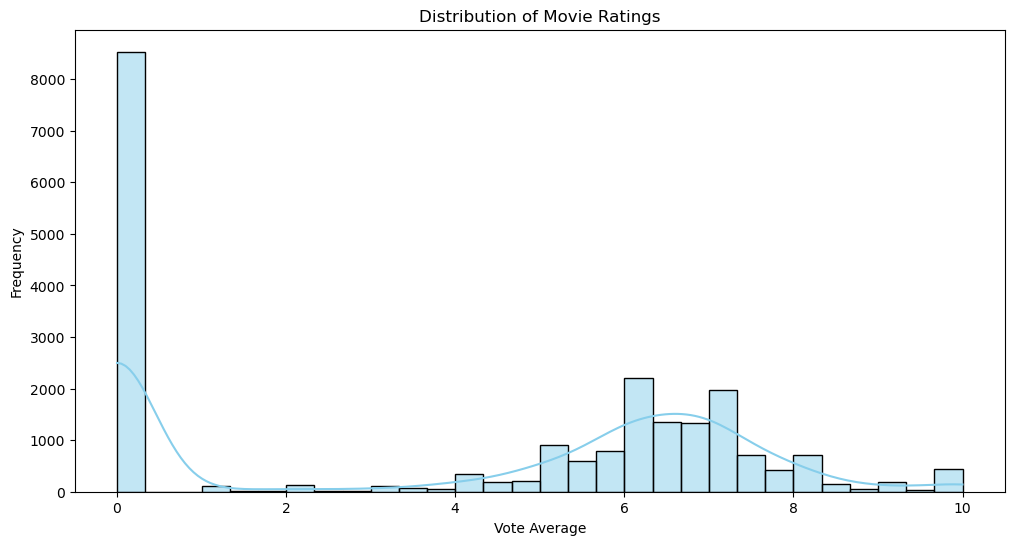

In [69]:
#Create histogram of the distribution of movie ratings for our total dataset
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


### Top 15 Movies: Revenue vs. Profit

#### Which 15 movies brought in the most revenue?


In [70]:
# Sort the DataFrame by 'revenue' in descending order
top_15_movies_revenue = df.sort_values(by='revenue', ascending=False).head(15)

# Display the top 10 movies
top_15_movies_revenue[['title', 'revenue', 'release_year']]

,title,revenue,release_year
40,Frozen II,1450026933,2019
67,The Super Mario Bros. Movie,1355725263,2023
11,Frozen,1274219009,2013
23,Incredibles 2,1242805359,2018
34,Minions,1156730962,2015
38,Toy Story 4,1073394593,2019
17,Toy Story 3,1066969703,2010
70,Despicable Me 3,1031552585,2017
26,Finding Dory,1028570889,2016
12,Zootopia,1023784195,2016


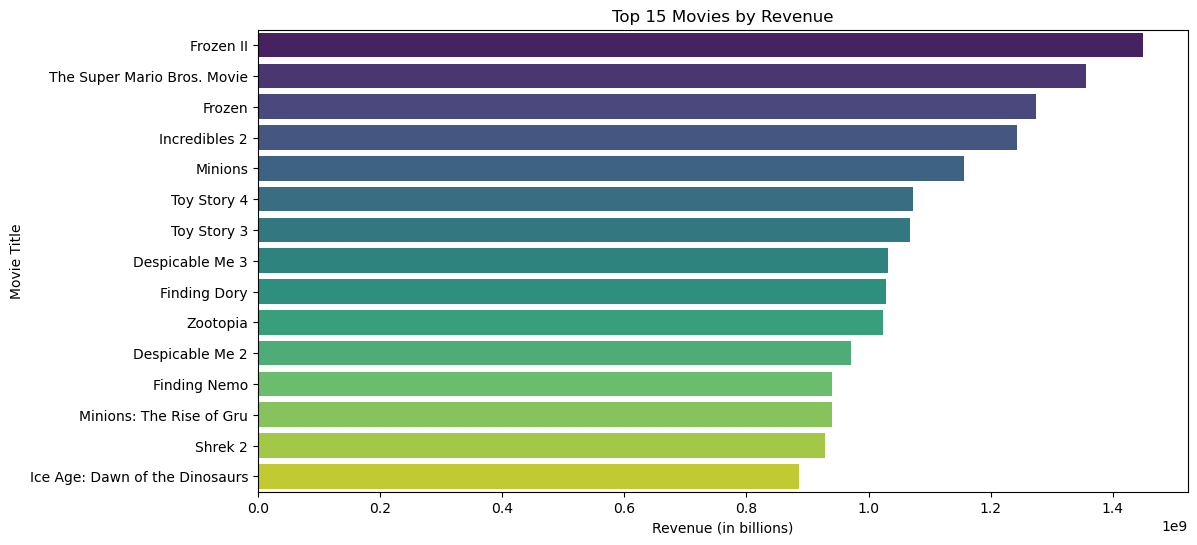

In [71]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='title', data=top_15_movies_revenue, palette='viridis', dodge=False)
plt.title('Top 15 Movies by Revenue')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Movie Title')
plt.show()


#### Which 15 movies were the most profitable? 

In [72]:
# Sort the DataFrame by 'profit' in descending order
top_15_profitable_movies = df.sort_values(by='profit', ascending=False).head(15)

# Display the top 15 profitable movies
print(top_15_profitable_movies[['title', 'profit']])

                              title      profit
40                        Frozen II  1300026933
67      The Super Mario Bros. Movie  1255725263
11                           Frozen  1124219009
34                          Minions  1082730962
23                    Incredibles 2  1042805359
70                  Despicable Me 3   951552585
38                      Toy Story 4   898394593
30                  Despicable Me 2   894761885
12                         Zootopia   873784195
17                      Toy Story 3   866969703
166        Minions: The Rise of Gru   854628210
2                      Finding Nemo   846335536
26                     Finding Dory   828570889
51          The Secret Life of Pets   800457937
50   Ice Age: Dawn of the Dinosaurs   796686817


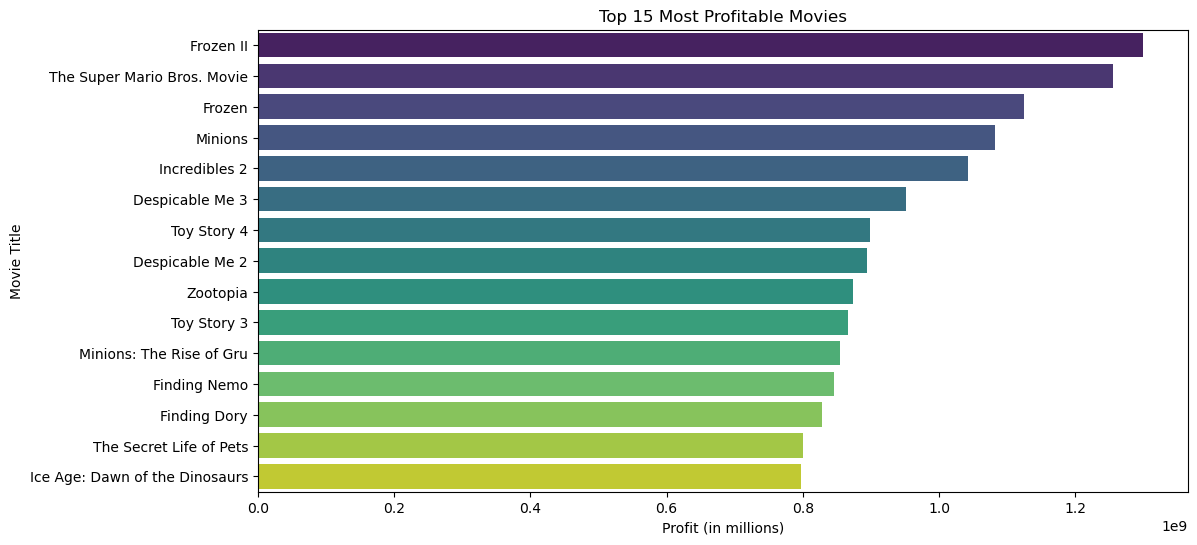

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='profit', y='title', data=top_15_profitable_movies, palette='viridis')
plt.title('Top 15 Most Profitable Movies')
plt.xlabel('Profit (in millions)')
plt.ylabel('Movie Title')
plt.show()

#### Put these side by side for easier comparison:

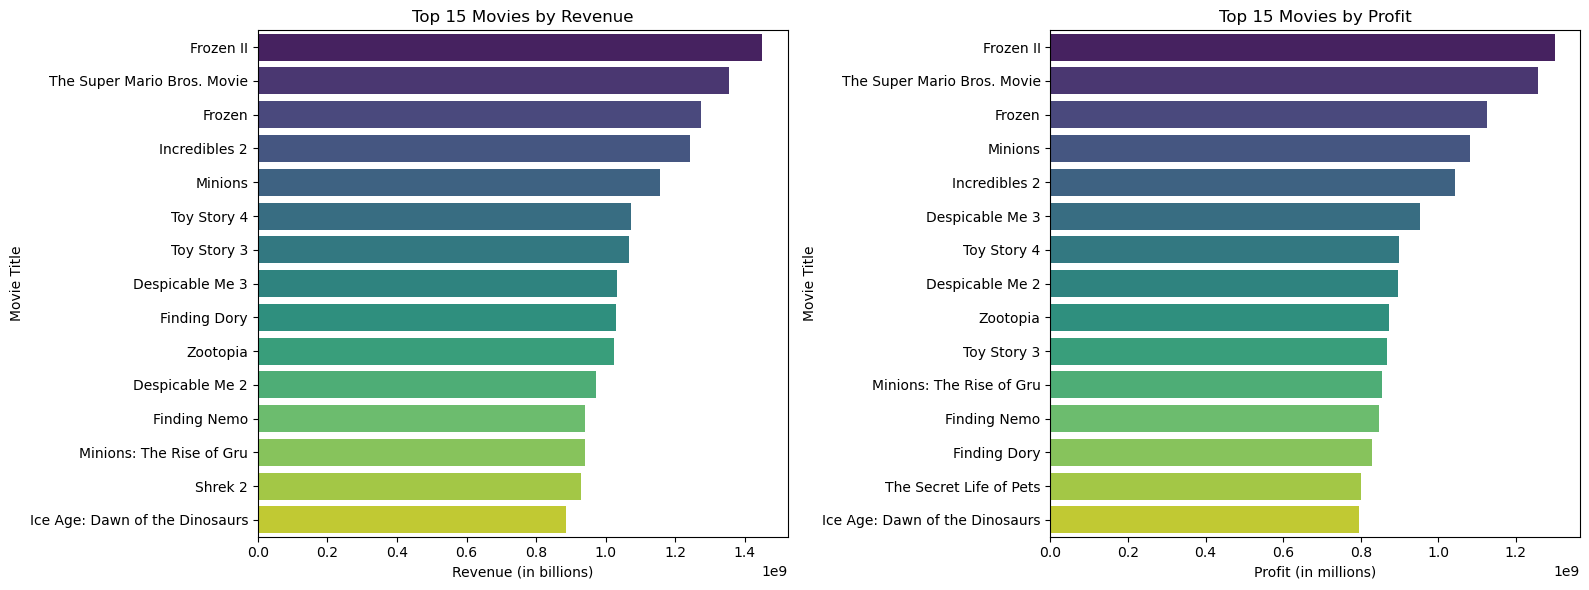

In [74]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for revenue
sns.barplot(x='revenue', y='title', data=top_15_movies_revenue, palette='viridis', ax=axes[0])
axes[0].set_title('Top 15 Movies by Revenue')
axes[0].set_xlabel('Revenue (in billions)')
axes[0].set_ylabel('Movie Title')

# Plot for profit
sns.barplot(x='profit', y='title', data=top_15_profitable_movies, palette='viridis', ax=axes[1])
axes[1].set_title('Top 15 Movies by Profit')
axes[1].set_xlabel('Profit (in millions)')
axes[1].set_ylabel('Movie Title')

# Adjust layout
plt.tight_layout()
plt.show()

### Most Profitable Genres

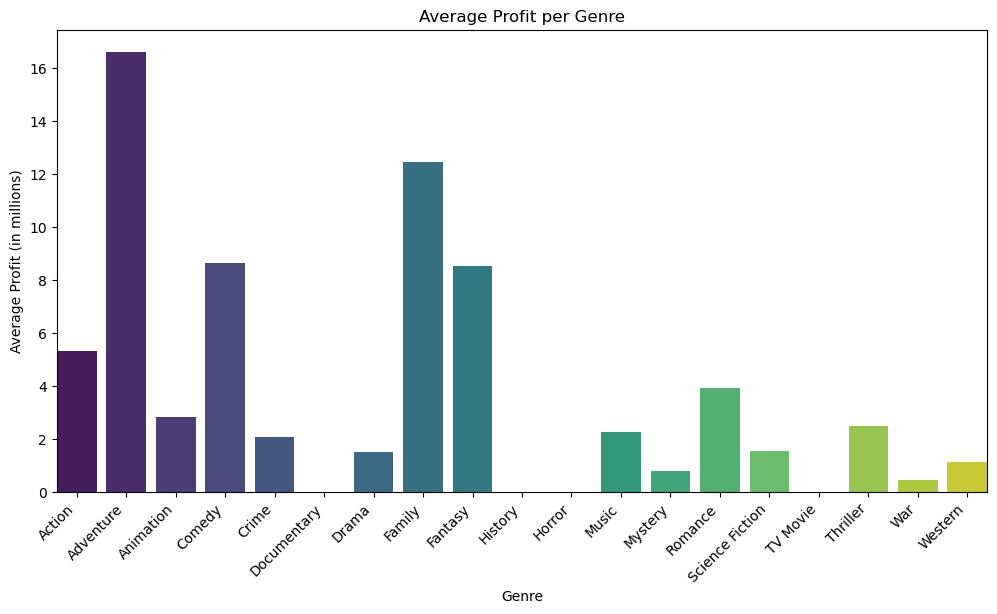

In [75]:
# Since our genre column is a nested list, we need to explode the 'genres' column to have one row per genre for each movie
df_genre_exploded = df.explode('genres')

# Group by genre and calculate the average 'revenue' for each genre
genre_profit_mean = df_genre_exploded.groupby('genres')['profit'].mean()

# Convert 'revenue' to millions for better readability
genre_profit_mean_million = genre_profit_mean / 1e6

# Create the 'revenue_million' column
df_genre_exploded['profit_million'] = df_genre_exploded['profit'] / 1e6

# Plotting average revenue per genre
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_profit_mean_million.index, y=genre_profit_mean_million.values, palette='viridis', dodge=False)
ax.set(ylabel='Average Profit (in millions)', xlabel='Genre')
ax.margins(x=0)  # Adjust the margin as needed
ax.set_ylim(bottom=0)  # Set the bottom limit to zero
plt.title('Average Profit per Genre')
plt.xticks(rotation=45, ha='right')
plt.show()


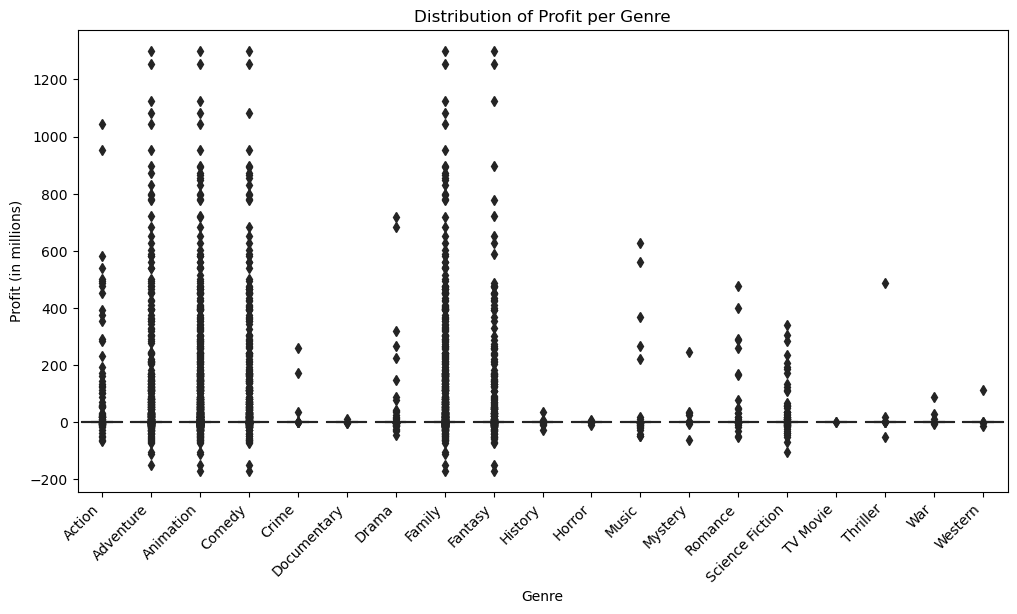

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='profit_million', data=df_genre_exploded, palette='viridis', dodge=False, order=sorted(df_genre_exploded['genres'].unique()))
plt.title('Distribution of Profit per Genre')
plt.ylabel('Profit (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top 10 Production Companies

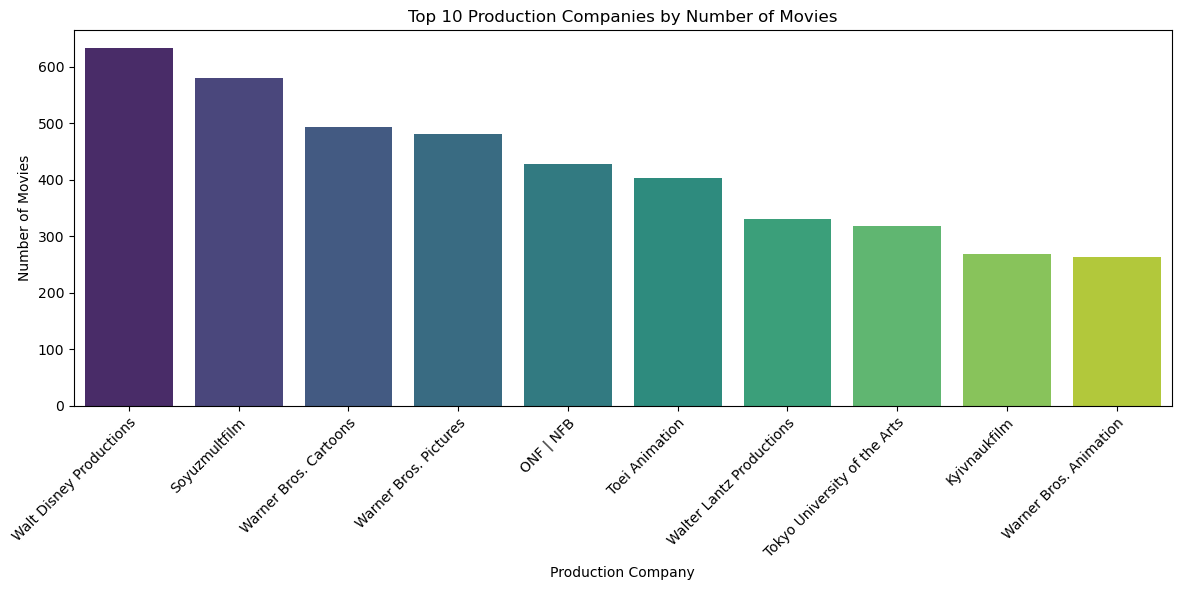

In [77]:
# Explode the 'production_companies' column into separate rows
df_expanded_companies = df.explode('production_companies')

# Count the number of movies for each production company
movies_per_company = df_expanded_companies['production_companies'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=movies_per_company.index[:10], y=movies_per_company.values[:10], hue=movies_per_company.index[:10], palette='viridis', dodge=False)
plt.title('Top 10 Production Companies by Number of Movies')
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

## Let's Dig a Bit Deeper:

#### Trends in 'Revenue' Over Different Years

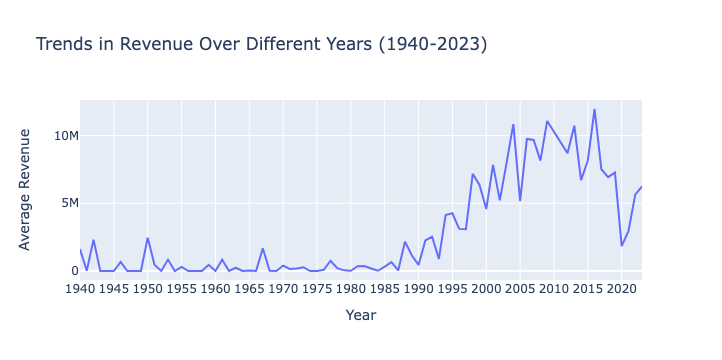

In [78]:
# Calculate average 'revenue' for each year
average_revenue_by_year = df.groupby('release_year')['revenue'].mean()

# Filter data for the years 1940 to 2023
filtered_df = df[(df['release_date'].dt.year >= 1940) & (df['release_date'].dt.year <= 2023)]

# Calculate average 'revenue' for each year
average_revenue_by_year = filtered_df.groupby('release_year')['revenue'].mean().reset_index()

# Plotting with plotly
fig = px.line(average_revenue_by_year, x='release_year', y='revenue', title='Trends in Revenue Over Different Years (1940-2023)',
              labels={'revenue': 'Average Revenue', 'release_year': 'Year'})

# Add ticks every 5 years
fig.update_xaxes(tickmode='linear', tick0=1940, dtick=5)

# Show the interactive plot
fig.show()

#### Top 5 Movies for each year from 2019-2023

In [79]:
#Filter the data for the years 2019-2023
df_filtered = df[(df['release_year'] >= 2019) & (df['release_year'] <=2023)]

#Group by 'release_year' and retrieve top 5 movies based of vote_count
top_movies_by_year = df_filtered.groupby('release_year').apply(lambda x: x.nlargest(5, 'vote_count'))
print(top_movies_by_year[['release_year', 'title', 'vote_count']])

                  release_year  \
release_year                     
2019         38           2019   
             40           2019   
             83           2019   
             151          2019   
             177          2019   
2020         36           2020   
             86           2020   
             153          2020   
             156          2020   
             179          2020   
2021         44           2021   
             52           2021   
             75           2021   
             134          2021   
             139          2021   
2022         71           2022   
             119          2022   
             166          2022   
             167          2022   
             192          2022   
2023         67           2023   
             121          2023   
             195          2023   
             474          2023   
             483          2023   

                                                              title  \
release_ye

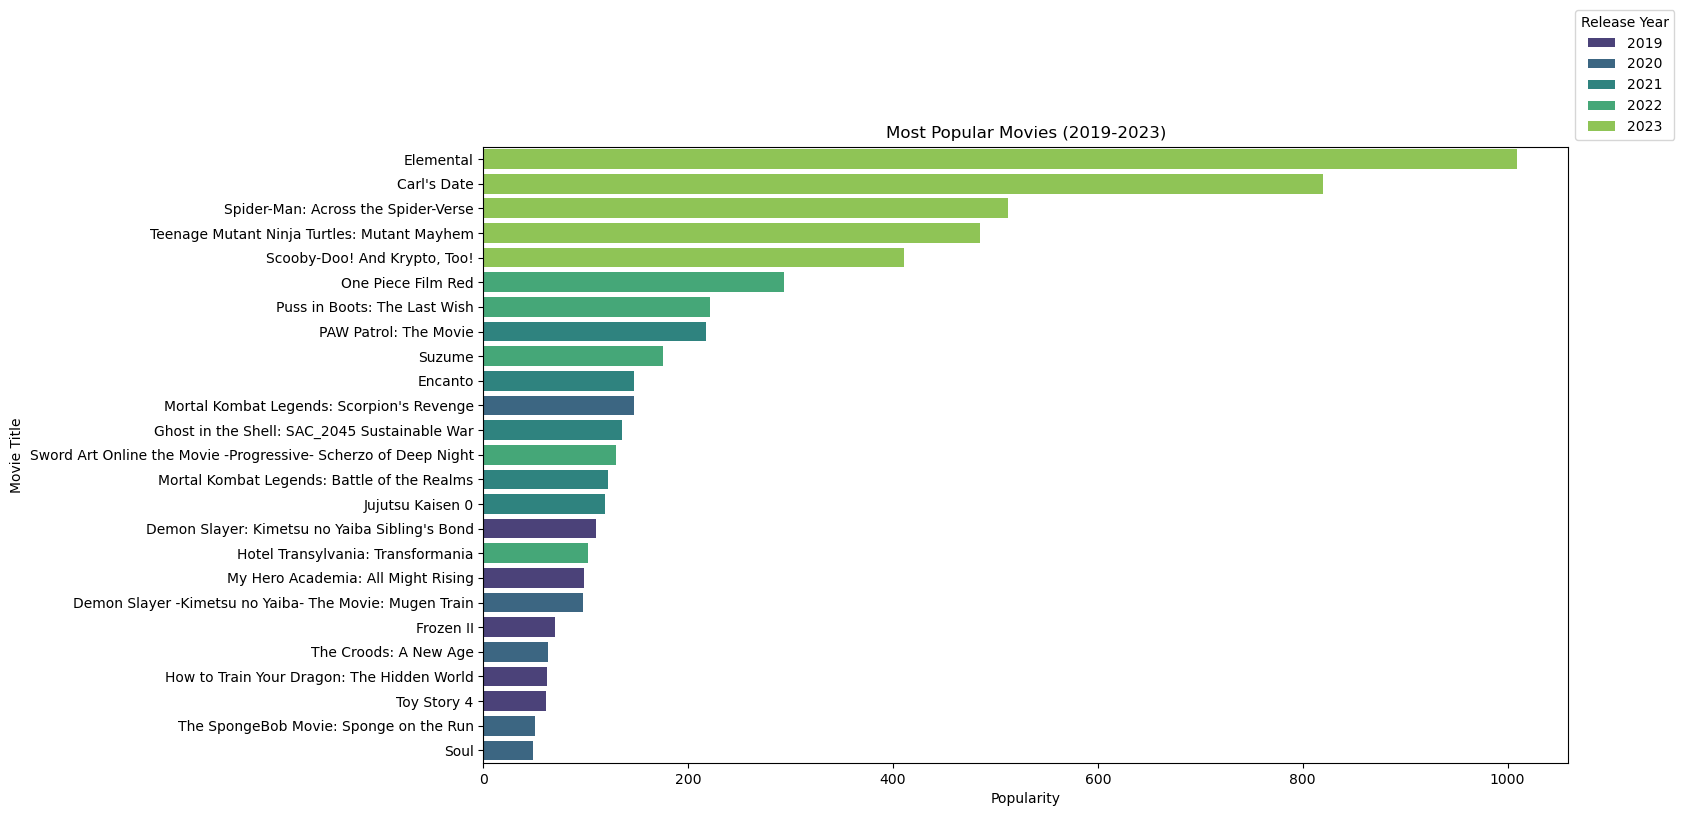

In [80]:
movie_popularity_per_year = df[df['release_year'].between(2019, 2023)].sort_values(by='popularity', ascending=False).groupby('release_year').head(5)


#plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='popularity', y='title', hue='release_year', data=movie_popularity_per_year, palette='viridis', dodge=False)
plt.title('Most Popular Movies (2019-2023)')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.legend(title='Release Year', bbox_to_anchor=(1,1))
plt.show()

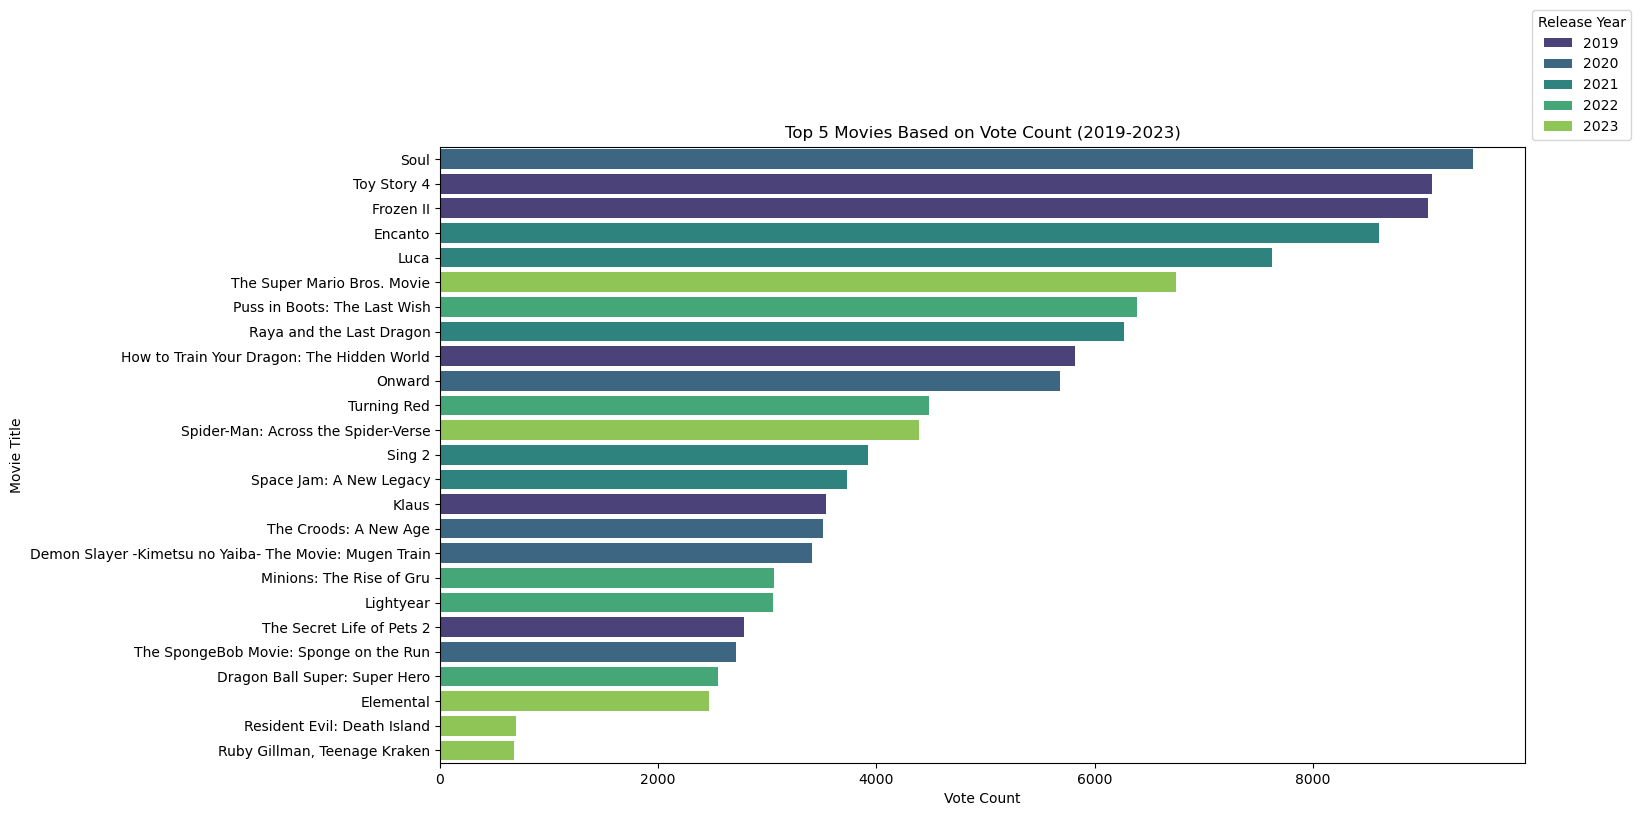

In [81]:
# Create a DataFrame with the top 5 movies for each year from 2019 to 2023
top_movies_per_year = df[df['release_year'].between(2019, 2023)].sort_values(by='vote_count', ascending=False).groupby('release_year').head(5)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='vote_count', y='title', hue='release_year', data=top_movies_per_year, palette='viridis', dodge=False)
plt.title('Top 5 Movies Based on Vote Count (2019-2023)')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.legend(title='Release Year', bbox_to_anchor=(1,1))
plt.show()

## The Correlation Matrix:

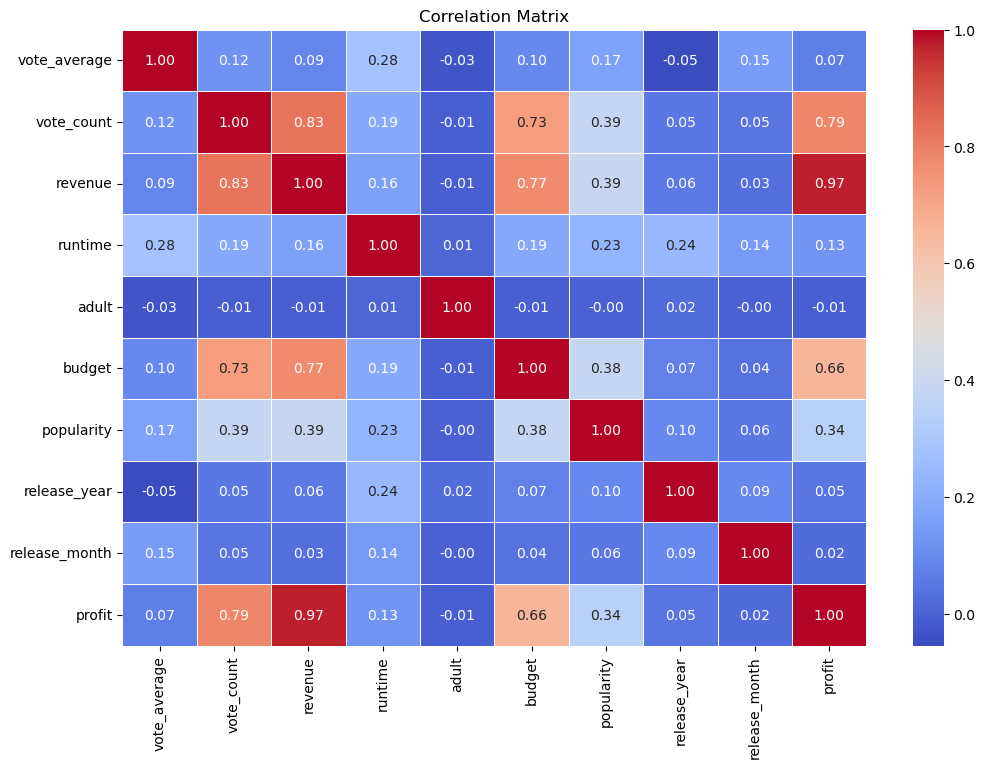

In [82]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


*** Note that this correlation matrix only captures the existing numerical variables of the current dataset. ***


## Linear Regression

#### Is the budget amount for a movie a good predictor for how much revenue the movie will bring?

Linear regression allows us to explore the relationship between a dependent variable and one or more independent variables. Without getting too technical, it basically assumes that something that experiences a change will cause a change in something else. In this case, we are assuming budget amount impacts revenue. 

In [83]:
#import the necessary libraries and tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [84]:
#assign our feature and target variable
feature = 'budget'
target = 'revenue'

In [85]:
#drop any rows with missing values
regression_data = df[[feature, target]].dropna()

In [86]:
#split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(regression_data[[feature]], regression_data[[target]], test_size=0.2, random_state=42)

In [87]:
#create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
#Make predictions on the test set
y_linear = model.predict(X_test)

In [89]:
#Evaluate model by calculating the mean squared error
mse = mean_squared_error(y_test, y_linear)

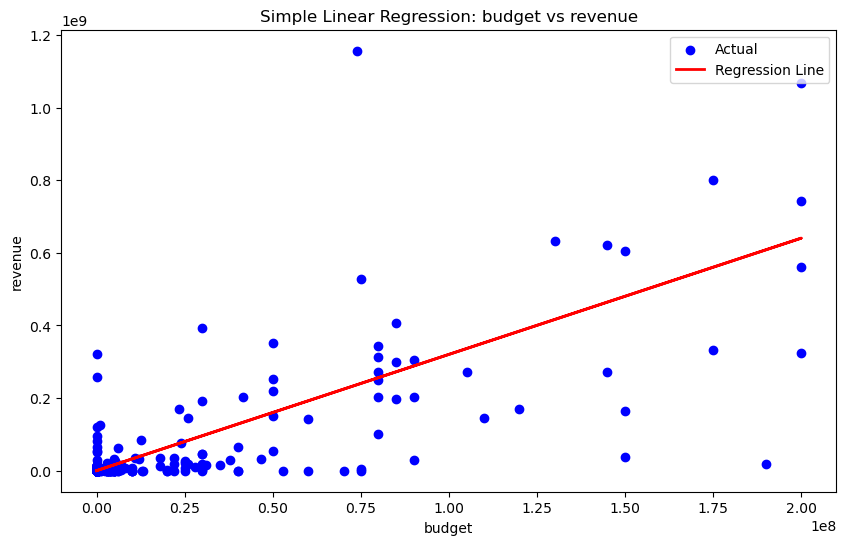

Mean Squared Error: 728332419111662.5


In [90]:
#Create a line plot of the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_linear, color='red', linewidth=2, label='Regression Line')
plt.title(f'Simple Linear Regression: {feature} vs {target}')
plt.xlabel(feature)
plt.ylabel(target)
plt.legend()
plt.show()

print(f'Mean Squared Error: {mse}')

The Mean Squared Error is very large, thus indicating that our model is not that great. We currently are not able to predict how much revenue a movie will earn based off its budget amount. Further analysis can explore other variables. We could also use other methods such as multiple regression, perform some feature engineering and even apply some data science techniques.

***Note:*** This dataset is further analyzed with data science techniques in the following project: ["Predictive Modeling with SciKit Learn and TensorFlow"](https://github.com/corgifuzz/movies/blob/main/Predictive-Modeling-ScikitLearn-and-Tensorflow.ipynb).